<a href="https://colab.research.google.com/github/123arv/Crime-monitoring-system/blob/123arv-patch-1/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression


***A. Data Collection and Preparation***

In [1]:

# Load the dataset
data = pd.read_csv('/content/Clean_Dataset.csv')  # Update this path as needed
data.columns = data.columns.str.strip()  # Strip whitespace from column headers
print("Data Loaded. Current DataFrame Columns:")
print(data.columns)


Data Loaded. Current DataFrame Columns:
Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')


***B. Handling Missing Values and Inconsistencies***

In [2]:
# Handle missing values
data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values

# Check for any remaining missing values
print("Missing Values in Each Column:")
print(data.isnull().sum())


<ipython-input-2-208428ac9c77>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values


Missing Values in Each Column:
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


***C. Analyzing When Most Flights Take Off***

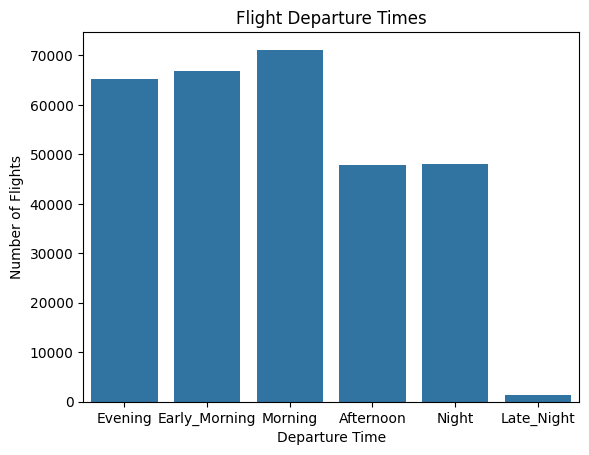

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize flight departure times
sns.countplot(x='departure_time', data=data)
plt.title('Flight Departure Times')
plt.xlabel('Departure Time')
plt.ylabel('Number of Flights')
plt.show()


***D. Analyzing Whether Flight Duration Impacts Price***

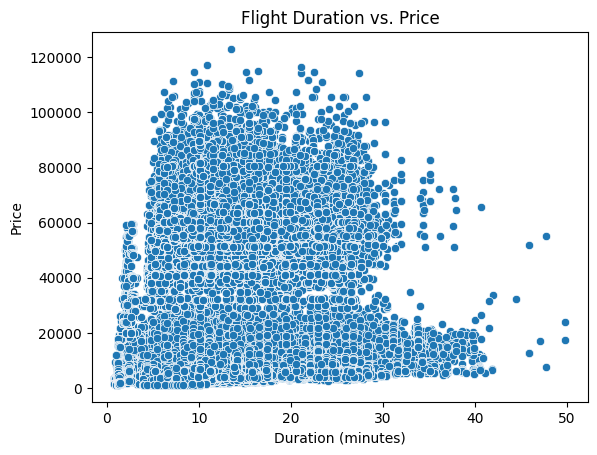

In [4]:
# Analyze the relationship between flight duration and price
sns.scatterplot(x='duration', y='price', data=data)
plt.title('Flight Duration vs. Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()


***E. Analyzing How the Number of Stops Impacts Price***

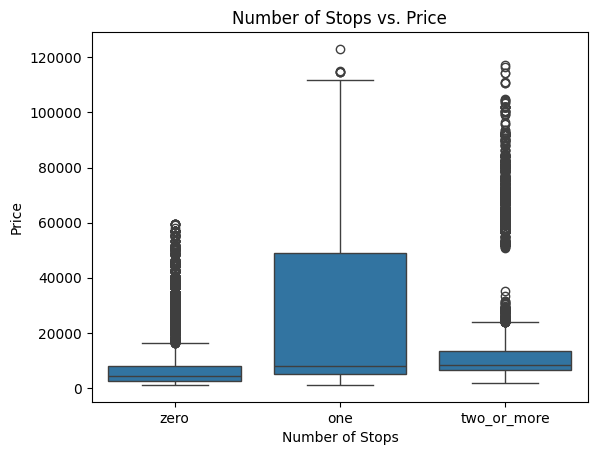

In [5]:
# Analyze how the number of stops impacts price
if 'stops' in data.columns:
    sns.boxplot(x='stops', y='price', data=data)
    plt.title('Number of Stops vs. Price')
    plt.xlabel('Number of Stops')
    plt.ylabel('Price')
    plt.show()
else:
    print("Column 'stops' not found in DataFrame.")


***F. Finding Which Airline Has the Highest Price***

In [6]:
# Finding which airline has the highest average price
highest_price_airline = data.groupby('airline')['price'].mean().idxmax()
highest_price = data.groupby('airline')['price'].mean().max()
print(f"The airline with the highest average price is {highest_price_airline} with an average price of {highest_price}.")


The airline with the highest average price is Vistara with an average price of 30396.53630170735.


***G. Applying One-Hot Encoding***

In [7]:
# Apply one-hot encoding to categorical features
data = pd.get_dummies(data, drop_first=True)


***H. Finding Mean Prices for Airlines***

In [8]:
# Calculate mean prices for each airline
airline_columns = [col for col in data.columns if col.startswith('airline_')]
mean_prices = {}
for airline in airline_columns:
    airline_name = airline.split('_', 1)[1]
    mean_price = data[data[airline] == 1]['price'].mean()
    mean_prices[airline_name] = mean_price

print("Mean Prices for Each Airline:")
for airline, price in mean_prices.items():
    print(f"{airline}: {price}")


Mean Prices for Each Airline:
Air_India: 23507.01911190229
GO_FIRST: 5652.007595045959
Indigo: 5324.216303339517
SpiceJet: 6179.278881367218
Vistara: 30396.53630170735


***I. Plotting Graphs to Spot Outliers***

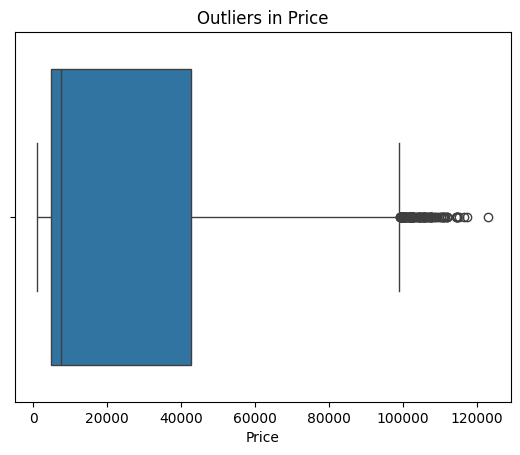

In [9]:
# Plotting to spot outliers in the price column
sns.boxplot(x=data['price'])
plt.title('Outliers in Price')
plt.xlabel('Price')
plt.show()


***J. Outlier Detection Using IQR Method for Price Column***

In [11]:
# Outlier detection using IQR method for the price column
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR)))]


***K. Plotting Graphs After Altering the Price Column***

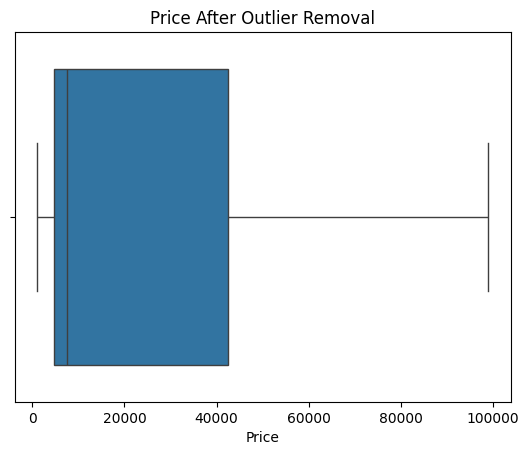

In [12]:
# Plotting graphs after outlier removal
sns.boxplot(x=data['price'])
plt.title('Price After Outlier Removal')
plt.xlabel('Price')
plt.show()


***L. Calculating Mutual Information Between the Target Variable "Price" and Other Features***

X shape: (300153, 1590)
y shape: (300153,)
   duration  days_left  airline_Air_India  airline_GO_FIRST  airline_Indigo  \
0      2.17          1              False             False           False   
1      2.33          1              False             False           False   
2      2.17          1              False             False           False   
3      2.25          1              False             False           False   
4      2.33          1              False             False           False   

   airline_SpiceJet  airline_Vistara  flight_6E-105  flight_6E-113  \
0              True            False          False          False   
1              True            False          False          False   
2             False            False          False          False   
3             False             True          False          False   
4             False             True          False          False   

   flight_6E-121  ...  departure_time_Late_Night  departure_t

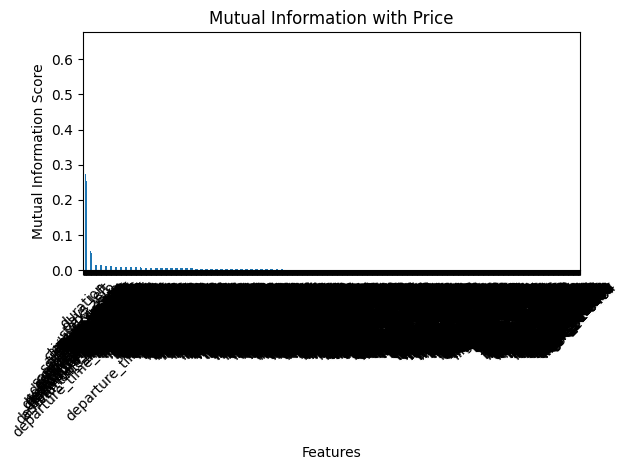

In [2]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Clean_Dataset.csv')

# Drop the 'Unnamed: 0' column if it exists
data = data.drop(columns=['Unnamed: 0'], errors='ignore')

# One-hot encoding for categorical variables including 'stops'
data = pd.get_dummies(data, columns=['airline', 'flight', 'source_city',
                                      'destination_city', 'class', 'departure_time',
                                      'arrival_time', 'stops'], drop_first=True)

# Convert relevant columns to numeric
numeric_columns = ['duration', 'days_left', 'price']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Preparing features and target variable
X = data.drop(['price'], axis=1)
y = data['price']

# Drop rows with NaN values in X and align y accordingly
X = X.dropna()
y = y[X.index]  # Align y with X after dropping NaNs

# Optional: Check shape and data to diagnose issues
print("X shape:", X.shape)
print("y shape:", y.shape)
print(X.head())  # Show a sample of X

# Optional: Use a smaller sample if X is too large
if X.shape[0] > 10000:  # Limit to 10,000 rows for testing
    X = X.sample(n=10000, random_state=42)
    y = y[X.index]  # Align y with sampled X

# Check if X is empty
if X.shape[0] == 0:
    raise ValueError("X is empty after dropping NaN values. Check your data processing steps.")

# Calculating mutual information
try:
    mutual_info = mutual_info_regression(X, y)
except MemoryError:
    print("Memory error: consider reducing the size of the dataset or features.")
    raise

# Creating a series for mutual information scores
mi_series = pd.Series(mutual_info, index=X.columns)

# Plotting mutual information scores
mi_series.sort_values(ascending=False).plot.bar()
plt.title('Mutual Information with Price')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better readability
plt.show()


***M. Training the Model and Predicting Price for the Test Data***

In [3]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predict prices for the test data
y_pred = model.predict(X_test)


***N. Model Evaluation and Prediction Analysis***

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model evaluation
print("Model Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Model Evaluation Metrics:
MAE: 2461.0375386047363
MSE: 18298819.194654312
R2 Score: 0.9659554958343506


***O. Tuning It with XGBoost Algorithm***

In [5]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("Best Model Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("R2 Score:", r2_score(y_test, y_pred_best))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best Model Evaluation Metrics:
MAE: 2387.406717590332
MSE: 17838259.26647818
R2 Score: 0.9668123126029968
